In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# DATA PREPROCESSING
# Convert categorical features into dummy vaiables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [5]:
# Split data into features and target
X = df_encoded.drop('price',axis=1)
y = df_encoded['price']

In [6]:
# TRAIN-TEST SPLIT
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
# MULTIPLE LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
# MODEL PREDICTION
y_pred = model.predict(X_test)

In [9]:
# EVALUATION METRICS
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [10]:
# MODEL COEFFICIENTS
coefficients = pd.Series(model.coef_, index=X.columns)
print("Model Coefficients:\n", coefficients.sort_values(ascending=False).round(2))
print("\nMean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 4))

Model Coefficients:
 bathrooms                          1094444.79
airconditioning_yes                 791426.74
hotwaterheating_yes                 684649.89
prefarea_yes                        629890.57
stories                             407476.59
basement_yes                        390251.18
mainroad_yes                        367919.95
guestroom_yes                       231610.04
parking                             224841.91
bedrooms                             76778.70
area                                   235.97
furnishingstatus_semi-furnished    -126881.82
furnishingstatus_unfurnished       -413645.06
dtype: float64

Mean Absolute Error (MAE): 970043.4
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.6529


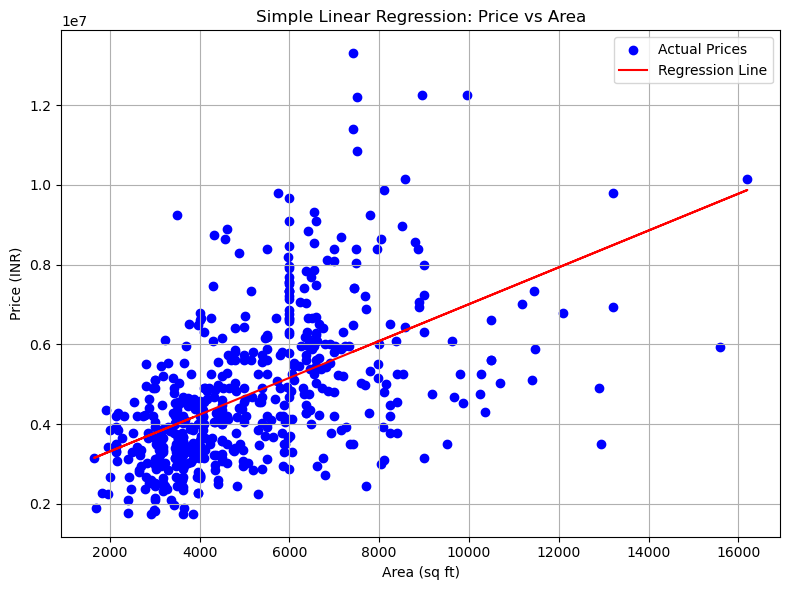

In [11]:
# SIMPLE LINEAR REGRESSION PLOT (PRICE vs AREA)
plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['price'], color='blue', label='Actual Prices')
simple_model = LinearRegression()
simple_model.fit(df[['area']], df['price'])
plt.plot(df['area'], simple_model.predict(df[['area']]), color='red', label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (INR)')
plt.title('Simple Linear Regression: Price vs Area')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()